#### Preparativos

In [1]:
!pip install shap

In [2]:
# Importaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import pickle
import shap
from shap.plots import colors

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
# Deslimitar/Limitar display Pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None)

#### Preparación Dataset

In [4]:
# Read Matches data

df = pd.read_csv(r'D:\DEV\Python\00_TFM_PALLADIUM\02_DATASETS_GENERADOS\Reservas_Feature_Engineered_v1.csv', sep = ';', decimal=',')

C:\Users\Diego\AppData\Local\Temp\ipykernel_740\2092705718.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\DEV\Python\00_TFM_PALLADIUM\02_DATASETS_GENERADOS\Reservas_Feature_Engineered_v1.csv', sep = ';', decimal=',')


#### Tipos de datos correctos

In [5]:
# Reconfigurar dtypes

df.drop(columns=['ID_RESERVA'], inplace=True) # No usar, ID
df.drop(columns=['ID_HOTEL'], inplace=True) # No usar, ID
df['HOTEL'] = df['HOTEL'].astype('category', errors='raise')
df.drop(columns=['LLEGADA'], inplace=True) # No usar, contamina extrapolación
df.drop(columns=['LLEGADA_ANO'], inplace=True) # No usar, contamina extrapolación
df['LLEGADA_MES'] = pd.to_numeric(df['LLEGADA_MES'], errors='raise').astype('category')
df['LLEGADA_DIAm'] = pd.to_numeric(df['LLEGADA_DIAm'], errors='raise').astype('category')
df['LLEGADA_DIAs'] = pd.to_numeric(df['LLEGADA_DIAs'], errors='raise').astype('category')
df['LLEGADA_AVANCE'] = pd.to_numeric(df['LLEGADA_AVANCE'], errors='raise').astype(float)
df.drop(columns=['SALIDA'], inplace=True) # No usar, contamina extrapolación
df.drop(columns=['SALIDA_ANO'], inplace=True) # No usar, contamina extrapolación
df['SALIDA_MES'] = pd.to_numeric(df['SALIDA_MES'], errors='raise').astype('category')
df['SALIDA_DIAm'] = pd.to_numeric(df['SALIDA_DIAm'], errors='raise').astype('category')
df['SALIDA_DIAs'] = pd.to_numeric(df['SALIDA_DIAs'], errors='raise').astype('category')
df['SALIDA_AVANCE'] = pd.to_numeric(df['SALIDA_AVANCE'], errors='raise').astype(float)
df['NOCHES'] = pd.to_numeric(df['NOCHES'], errors='raise').astype('Int64')
df['DURACION_ESTANCIA'] = df['DURACION_ESTANCIA'].astype('category', errors='raise')
df['REGIMEN'] = df['REGIMEN'].astype('category', errors='raise')
df.drop(columns=['ID_TIPO'], inplace=True) # No usar, ID
df['TIPO'] = df['TIPO'].astype('category', errors='raise')
df['USO'] = pd.to_numeric(df['USO'], errors='raise').astype('Int64')
df['PAX_NUM'] = pd.to_numeric(df['PAX_NUM'], errors='raise').astype('Int64')
df['PAX_CAT'] = df['PAX_CAT'].astype('category', errors='raise')
df['ADULTOS'] = pd.to_numeric(df['ADULTOS'], errors='raise').astype('Int64')
df['NENES'] = pd.to_numeric(df['NENES'], errors='raise').astype('Int64')
df['BEBES'] = pd.to_numeric(df['BEBES'], errors='raise').astype('Int64')
df.drop(columns=['ID_CLIENTE'], inplace=True) # No usar, ID
df['TIPO_CLIENTE'] = pd.to_numeric(df['TIPO_CLIENTE'], errors='raise').astype('category')
df['CLIENTE'] = df['CLIENTE'].astype('category', errors='raise')
df['GRUPO'] = pd.to_numeric(df['GRUPO'], errors='raise').astype('category')
df.drop(columns=['ID_MONEDA'], inplace=True) # No usar, ID
df['MONEDA'] = df['MONEDA'].astype('category', errors='raise')
df.drop(columns=['STATUS'], inplace=True) # No usar, redundante con variable objetivo
df.drop(columns=['MOTIVO'], inplace=True) # No usar, imposible ver el futuro
df.drop(columns=['CHECKIN'], inplace=True) # No usar, imposible ver el futuro
df['SUPLETORIA'] = pd.to_numeric(df['SUPLETORIA'], errors='raise').astype('Int64')
df['CUNAS'] = pd.to_numeric(df['CUNAS'], errors='raise').astype('Int64')
df.drop(columns=['FECHA_TOMA'], inplace=True) # No usar, contamina extrapolación
df.drop(columns=['FECHA_TOMA_ANO'], inplace=True) # No usar, contamina extrapolación
df['FECHA_TOMA_MES'] = pd.to_numeric(df['FECHA_TOMA_MES'], errors='raise').astype('category')
df['FECHA_TOMA_DIAm'] = pd.to_numeric(df['FECHA_TOMA_DIAm'], errors='raise').astype('category')
df['FECHA_TOMA_DIAs'] = pd.to_numeric(df['FECHA_TOMA_DIAs'], errors='raise').astype('category')
df['FECHA_TOMA_AVANCE'] = pd.to_numeric(df['FECHA_TOMA_AVANCE'], errors='raise').astype(float)
df.drop(columns=['FECHA_MOD'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df.drop(columns=['FECHA_MOD_ANO'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df.drop(columns=['FECHA_MOD_MES'], inplace=True) # No usar, imposible ver el futuro
df.drop(columns=['FECHA_MOD_DIAm'], inplace=True) # No usar, imposible ver el futuro
df.drop(columns=['FECHA_MOD_DIAs'], inplace=True) # No usar, imposible ver el futuro
df.drop(columns=['FECHA_MOD_AVANCE'], inplace=True) # No usar, imposible ver el futuro
df.drop(columns=['FECHA_CANCELACION'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df.drop(columns=['FECHA_CANCELACION_ANO'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df.drop(columns=['FECHA_CANCELACION_MES'], inplace=True) # No usar, imposible ver el futuro
df.drop(columns=['FECHA_CANCELACION_DIAm'], inplace=True) # No usar, imposible ver el futuro
df.drop(columns=['FECHA_CANCELACION_DIAs'], inplace=True) # No usar, imposible ver el futuro
df.drop(columns=['FECHA_CANCELACION_AVANCE'], inplace=True) # No usar, imposible ver el futuro
df['LT_TOMA_LLEGADA'] = pd.to_numeric(df['LT_TOMA_LLEGADA'], errors='raise').astype('Int64')
df.drop(columns=['LT_TOMA_CANCELACION'], inplace=True) # No usar, imposible ver el futuro
df.drop(columns=['ID_FIDELIDAD'], inplace=True) # No usar, ID
df['FIDELIDAD'] = df['FIDELIDAD'].astype('category', errors='raise')
df.drop(columns=['VALHAB'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df.drop(columns=['VALPEN'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df.drop(columns=['VALSERV'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df.drop(columns=['VALFIJOS'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df['COMERCIALIZADORA'] = pd.to_numeric(df['COMERCIALIZADORA'], errors='raise').astype('category')
df.drop(columns=['CMVALHAB'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df.drop(columns=['CMVALPEN'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df.drop(columns=['CMCVALSERV'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df['VALOR_USD'] = pd.to_numeric(df['VALOR_USD'], errors='raise').astype(float)
df['VALOR_USD_PAX'] = pd.to_numeric(df['VALOR_USD_PAX'], errors='raise').astype(float)
df['VALOR_USD_NOCHE'] = pd.to_numeric(df['VALOR_USD_NOCHE'], errors='raise').astype(float)
df['VALOR_USD_PAX_NOCHE'] = pd.to_numeric(df['VALOR_USD_PAX_NOCHE'], errors='raise').astype(float)
df.drop(columns=['AUTORIZO'], inplace=True) # No usar, de momento no muy claro
df['GRATIS'] = pd.to_numeric(df['GRATIS'], errors='raise').astype('category')
df['PAIS'] = df['PAIS'].astype('category', errors='raise')
df['CONTINENTE'] = df['CONTINENTE'].astype('category', errors='raise')
df['SEGMENTO'] = df['SEGMENTO'].astype('category', errors='raise')
df['FUENTE_NEGOCIO'] = df['FUENTE_NEGOCIO'].astype('category', errors='raise')
df['CANCELADA'] = pd.to_numeric(df['CANCELADA'], errors='raise').astype('category')

In [6]:
cat_cols = df.select_dtypes(include=['category']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [7]:
X = df.drop(columns=['CANCELADA'])

y = df['CANCELADA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Pickle

In [8]:
with open("modelo_lgbm_General.pkl", "rb") as f:
    modelo_lgbm_General = pickle.load(f)

In [9]:
y_test_pred = modelo_lgbm_General.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy Test     :", accuracy_test)

Accuracy Test     : 0.8141210754066129


In [10]:
# Clavado, funciona perfectamente

#### Estudio con SHAP

In [11]:
explainer = shap.Explainer(modelo_lgbm_General)
#explainer = shap.TreeExplainer(modelo_lgbm_General, data=X_test, model_output="probability")
X_test_sample = X_test.sample(n=10000, random_state=42)
shap_values = explainer(X_test_sample)

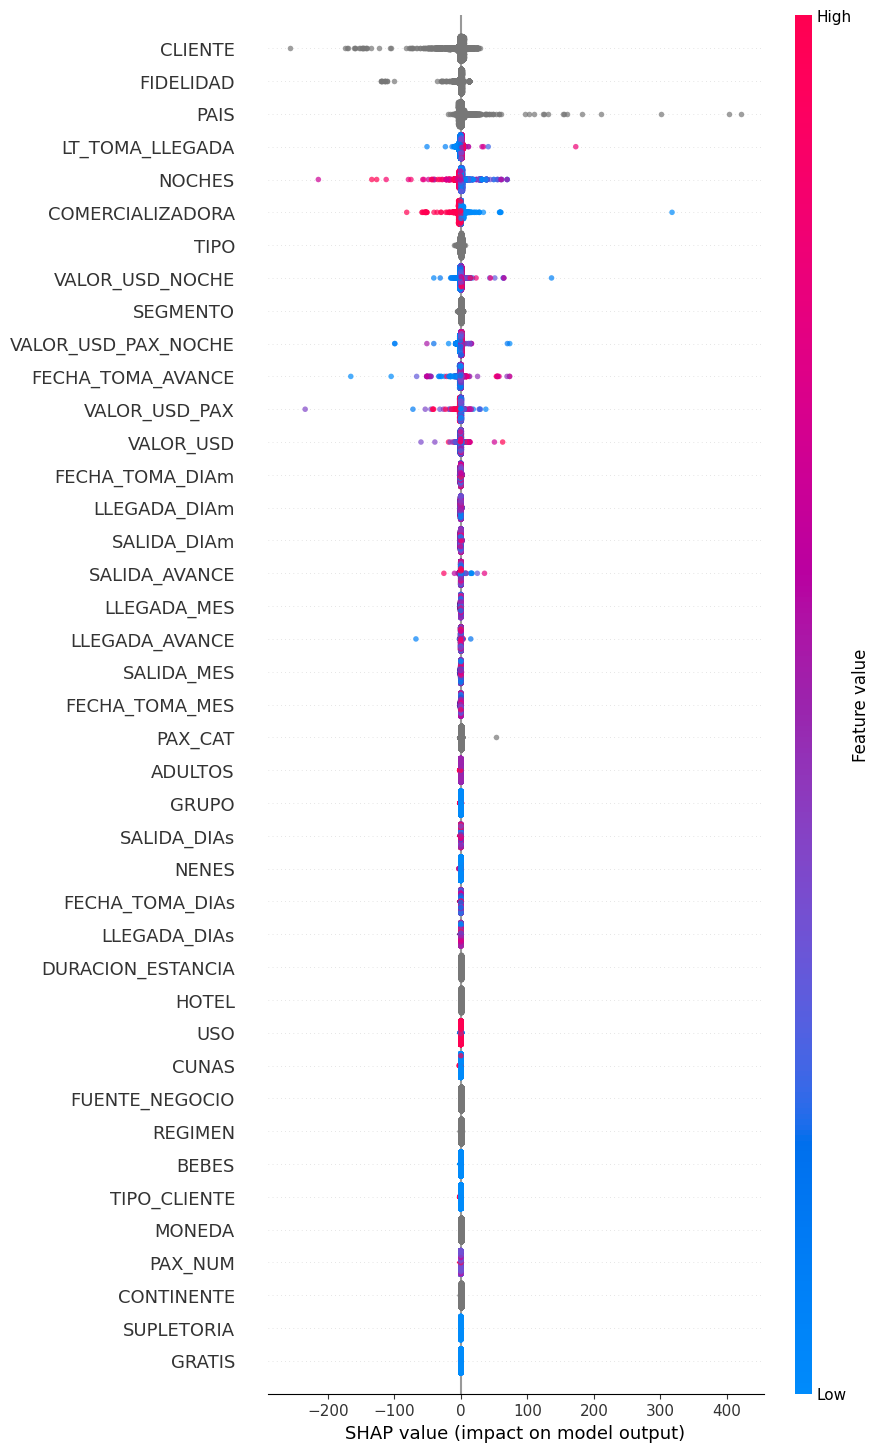

In [12]:
shap.plots.beeswarm(shap_values, max_display=50, alpha=0.7)

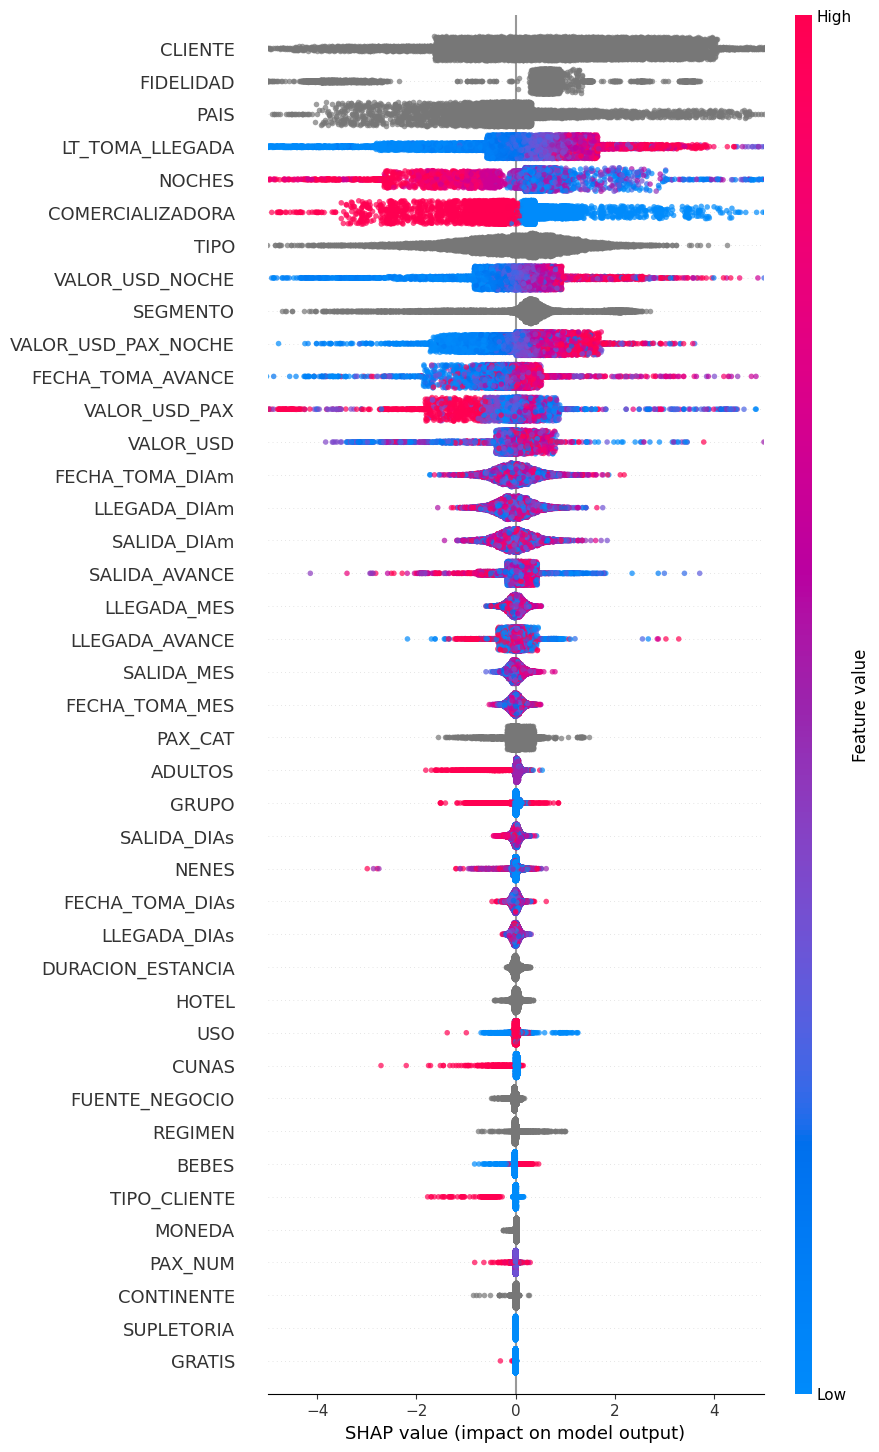

In [13]:
shap.plots.beeswarm(shap_values, max_display=50, alpha=0.7, show=False)
plt.xlim(-5, 5)  # Ajusta los límites del eje x
plt.show()  # Muestra el gráfico con los límites ajustados

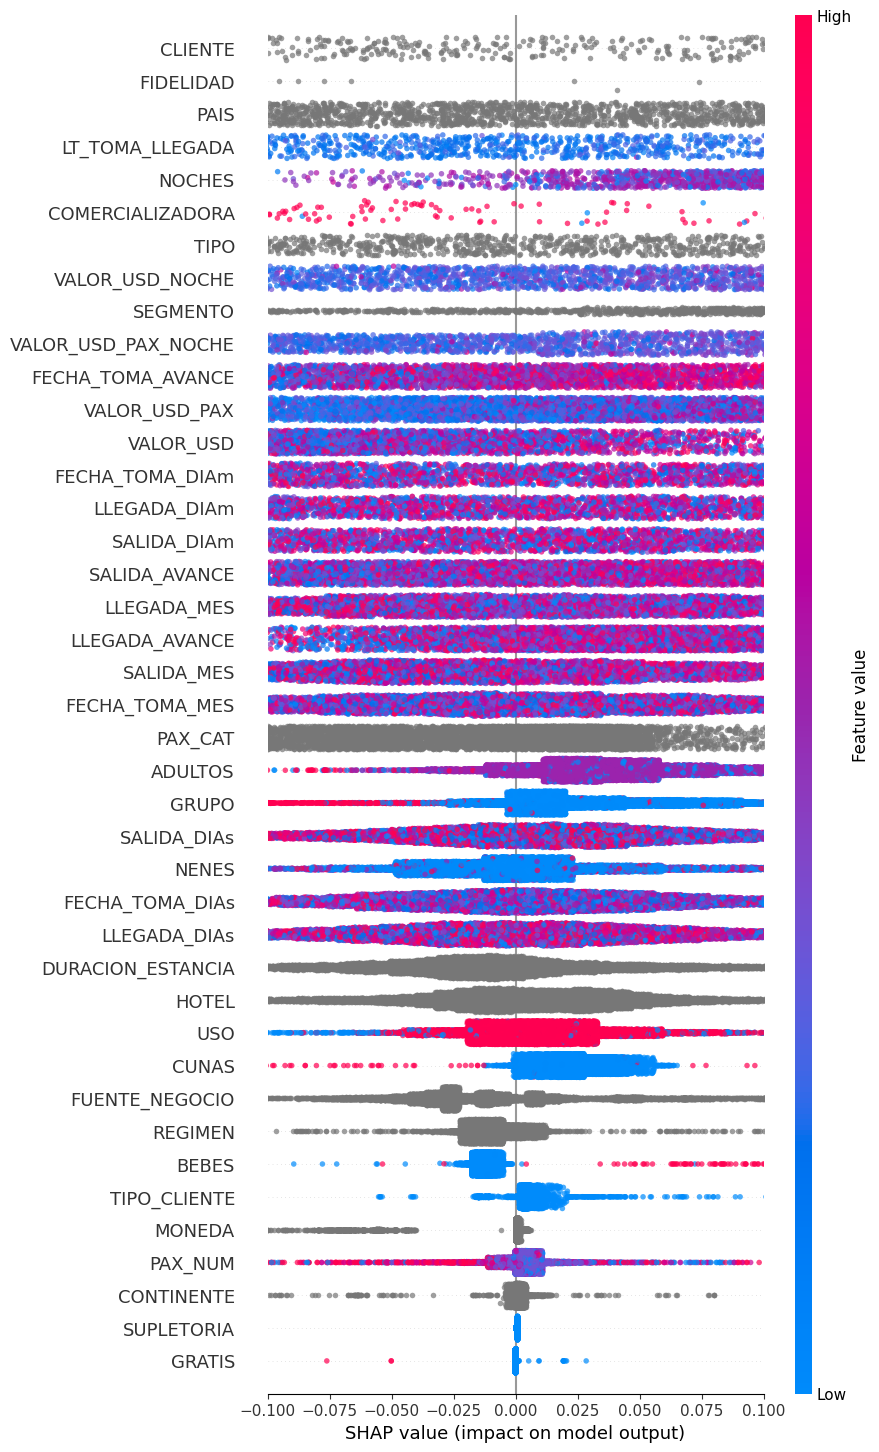

In [14]:
shap.plots.beeswarm(shap_values, max_display=50, alpha=0.7, show=False)
plt.xlim(-0.1, 0.1)  # Ajusta los límites del eje x
plt.show()  # Muestra el gráfico con los límites ajustados

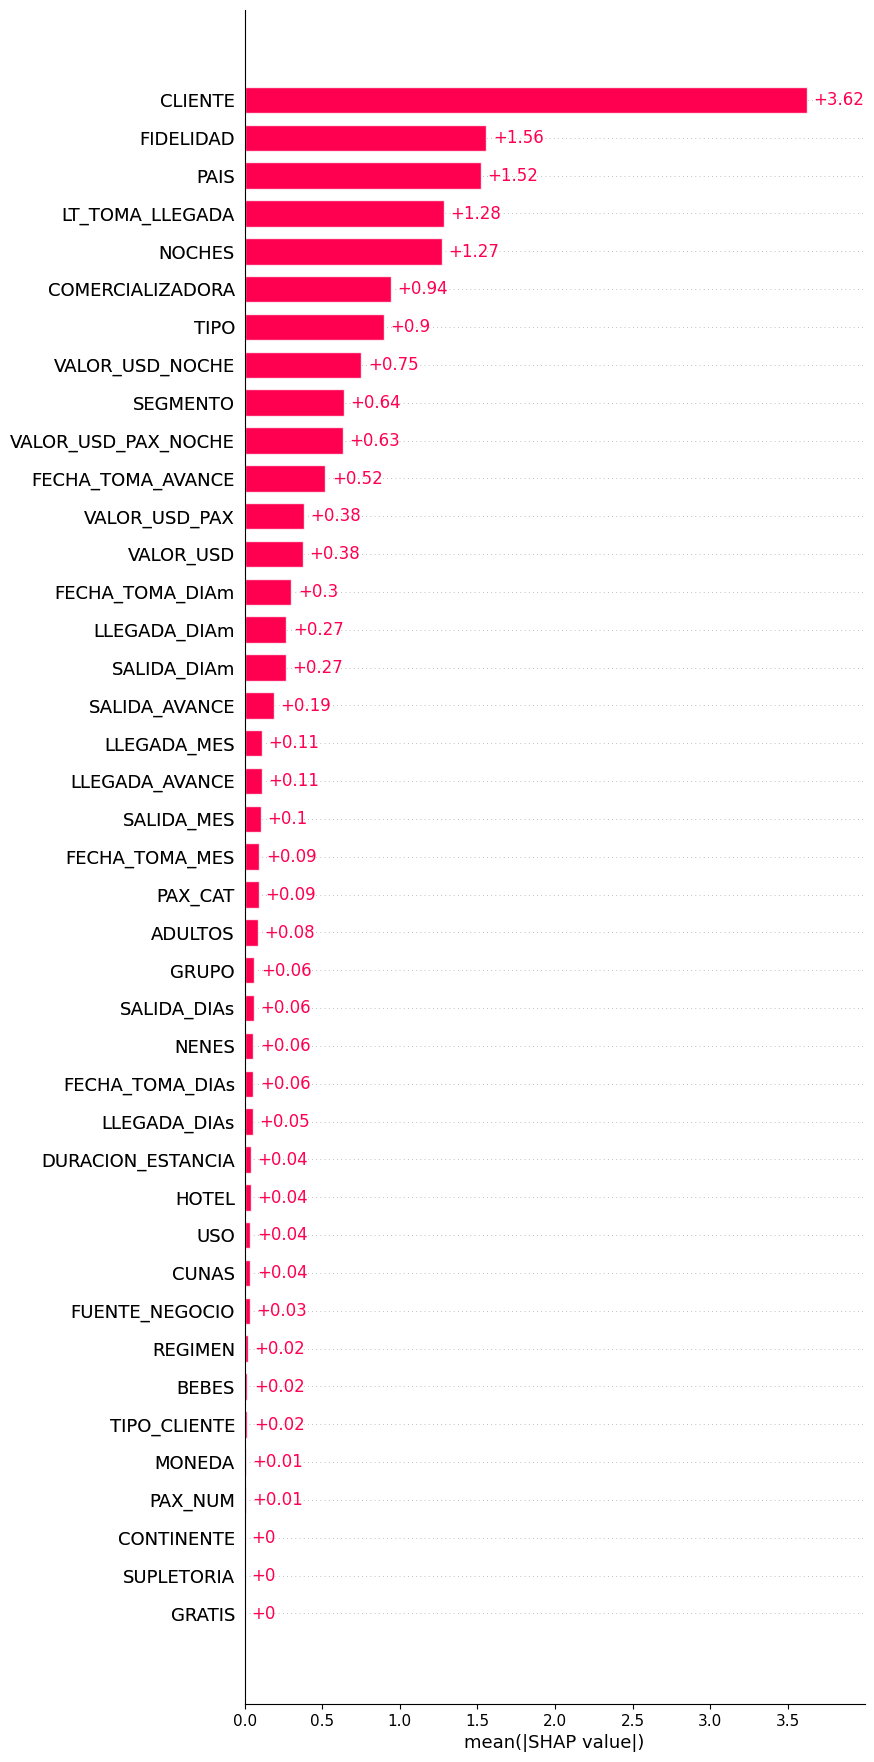

In [15]:
shap.plots.bar(shap_values, max_display=50)

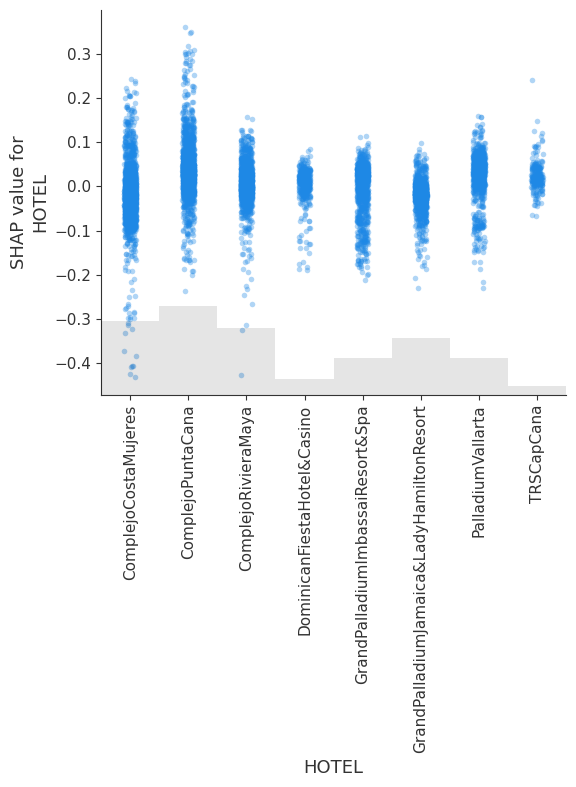

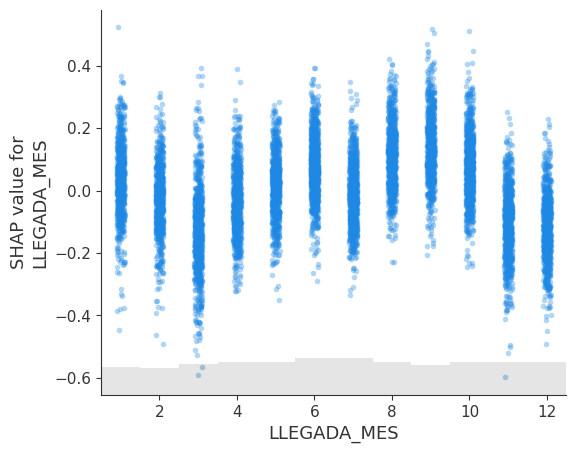

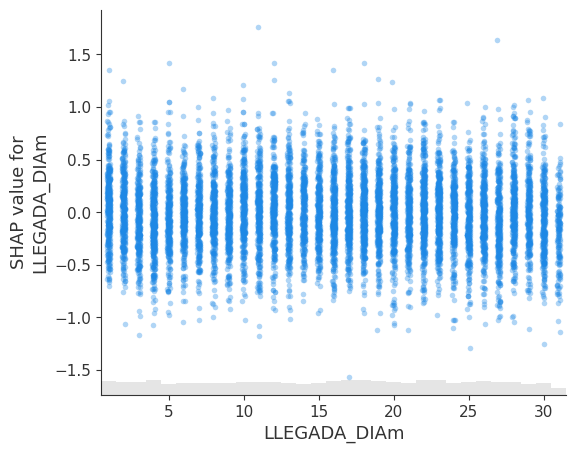

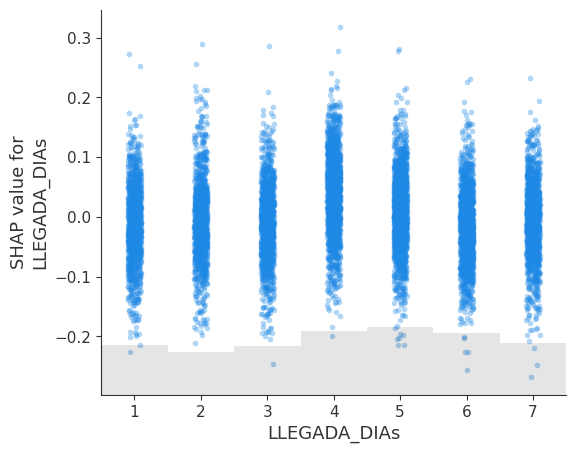

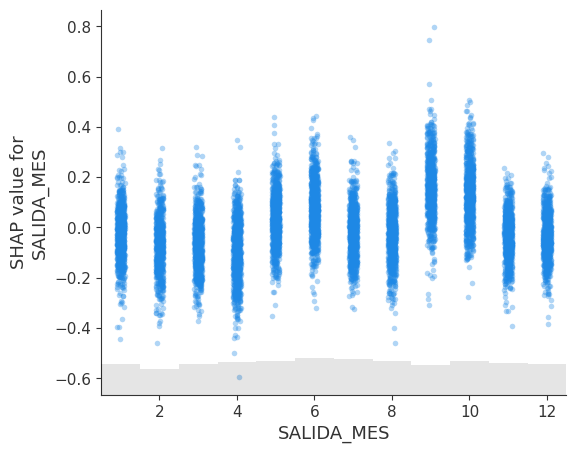

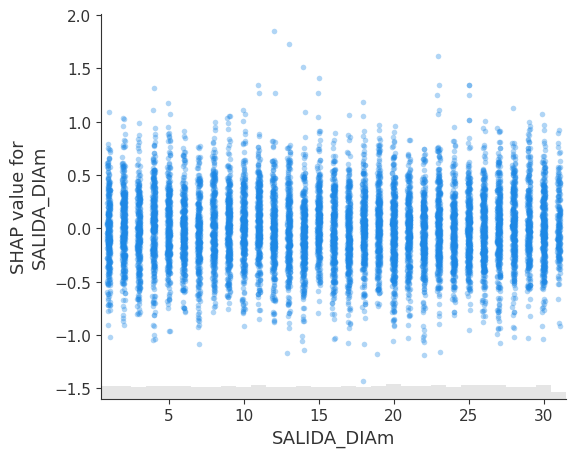

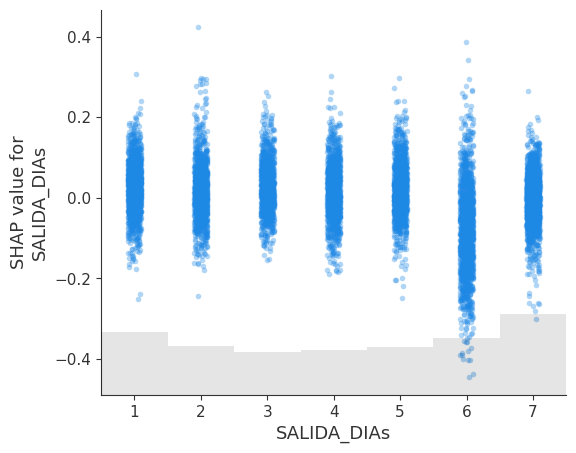

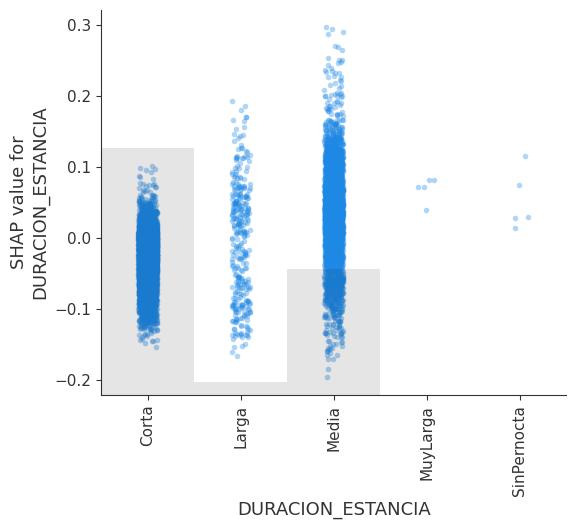

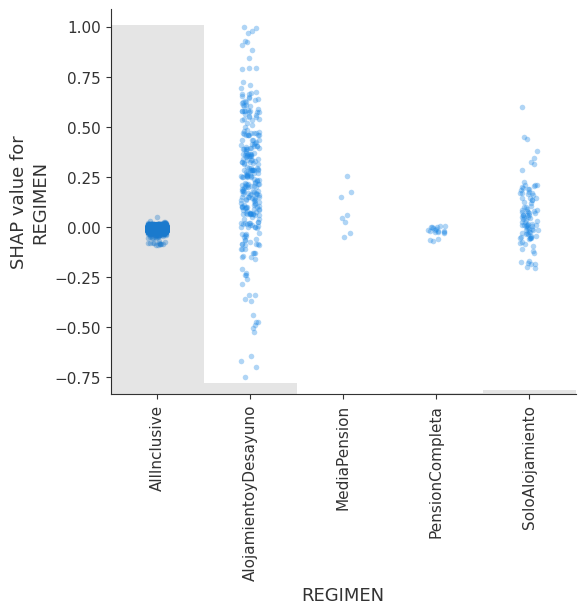

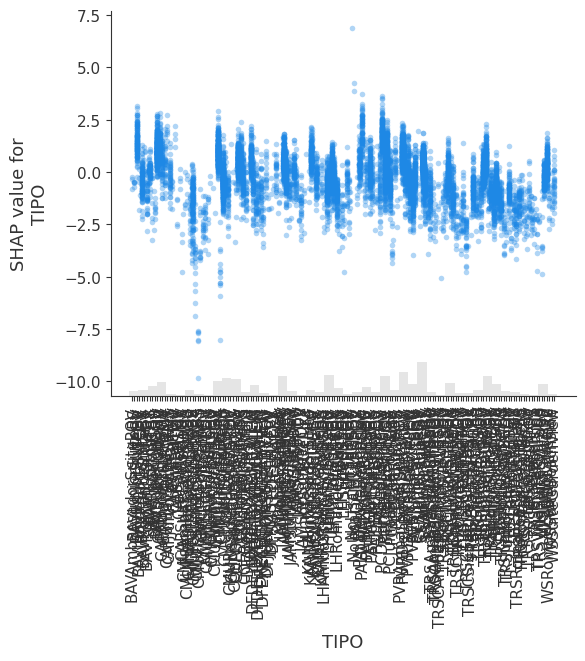

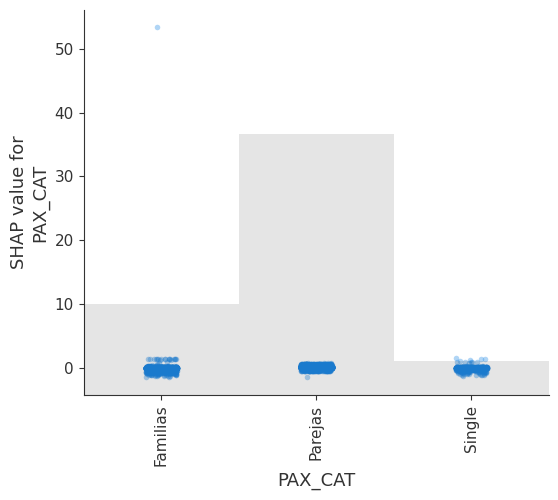

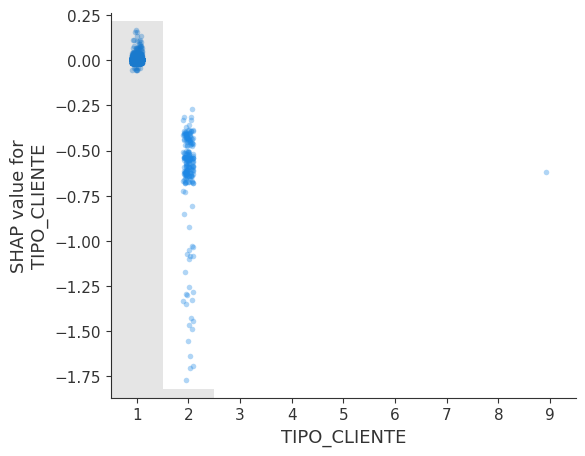

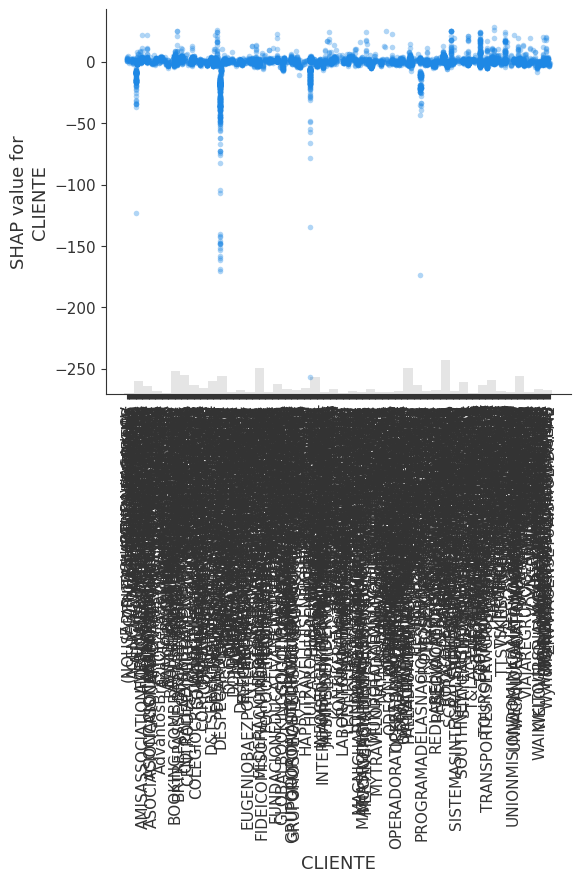

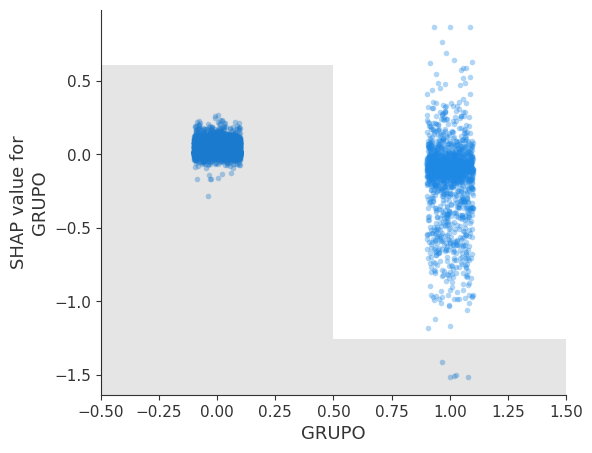

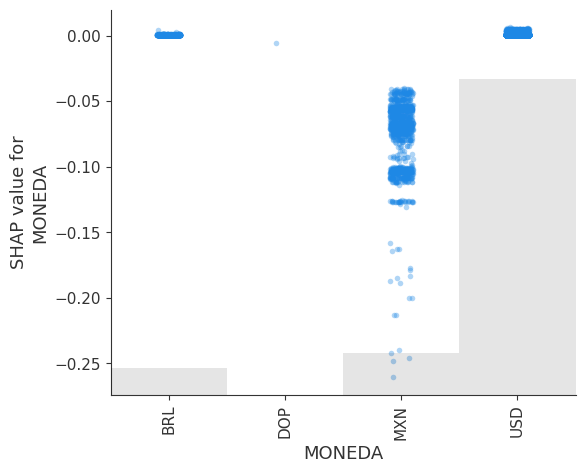

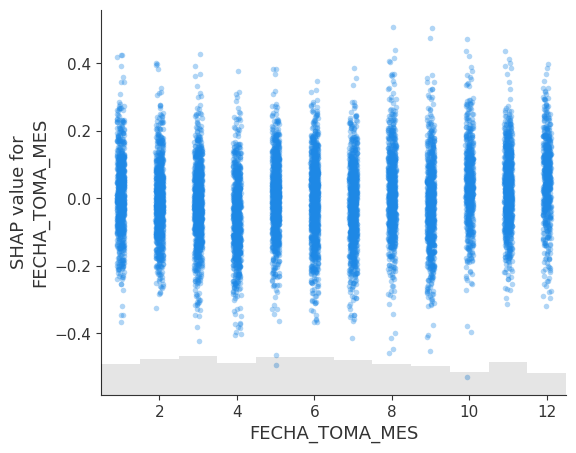

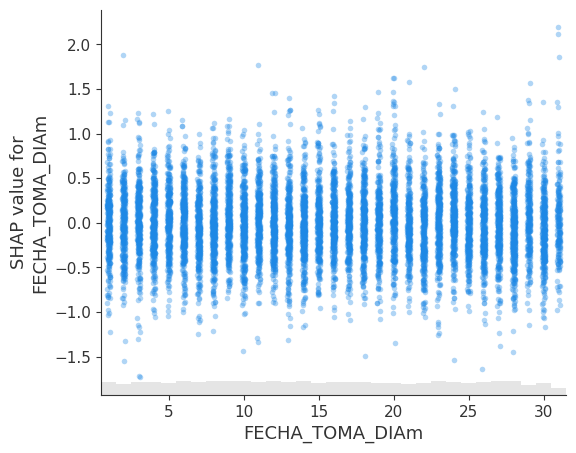

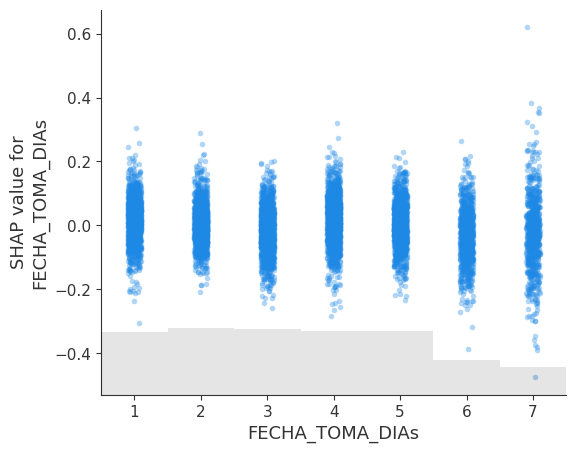

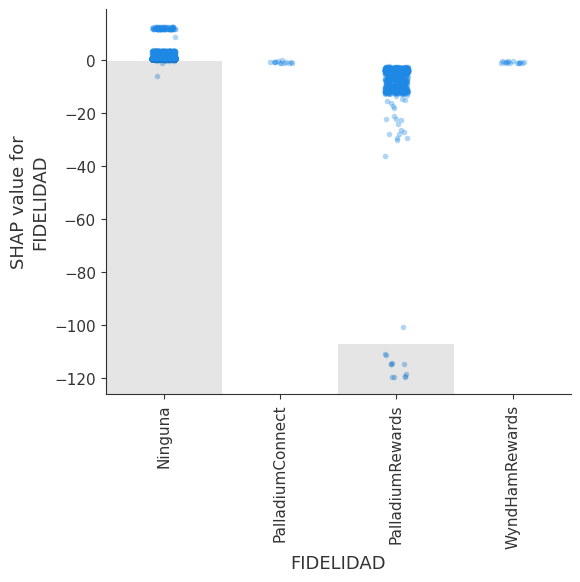

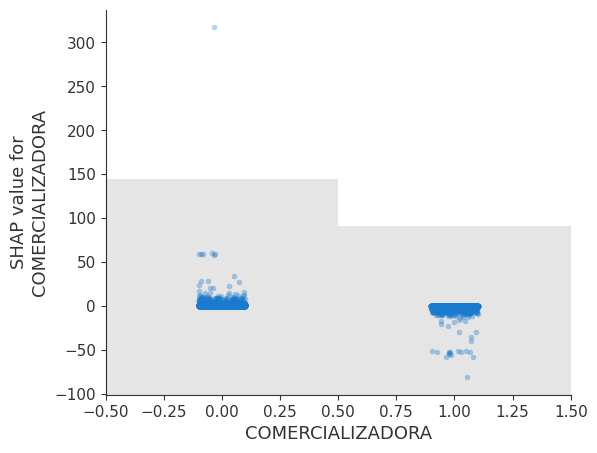

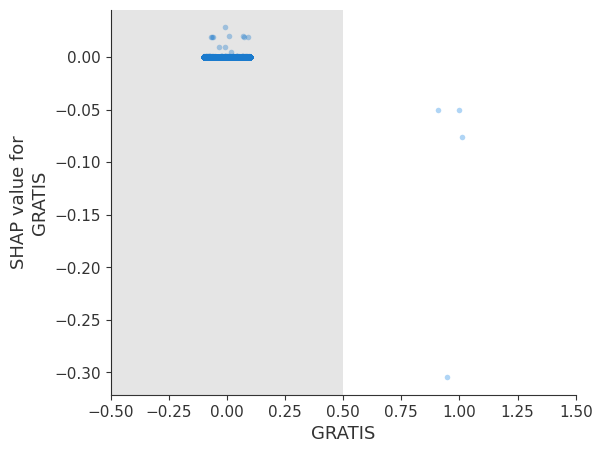

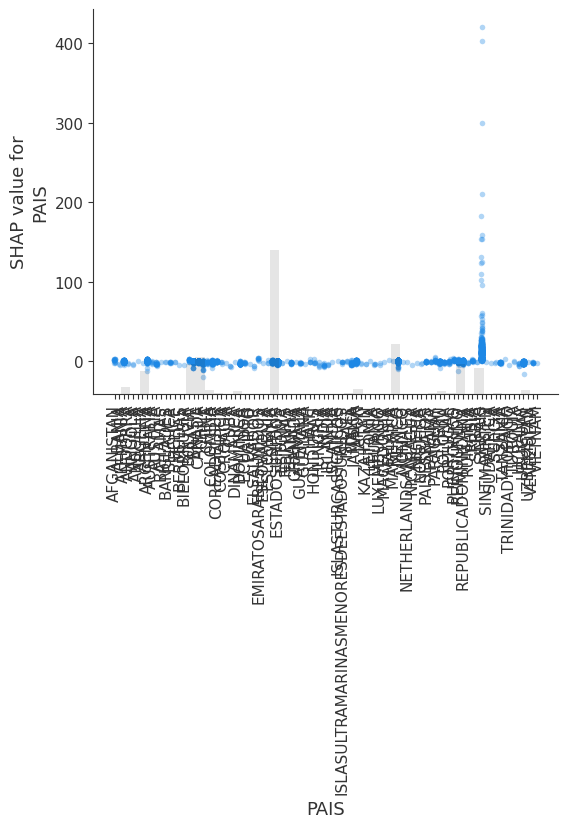

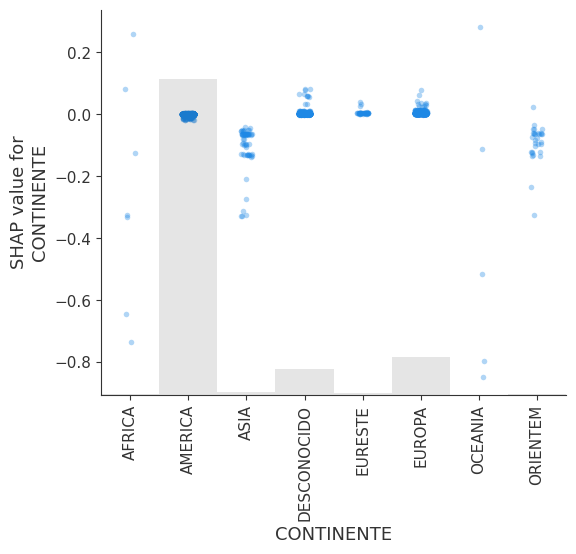

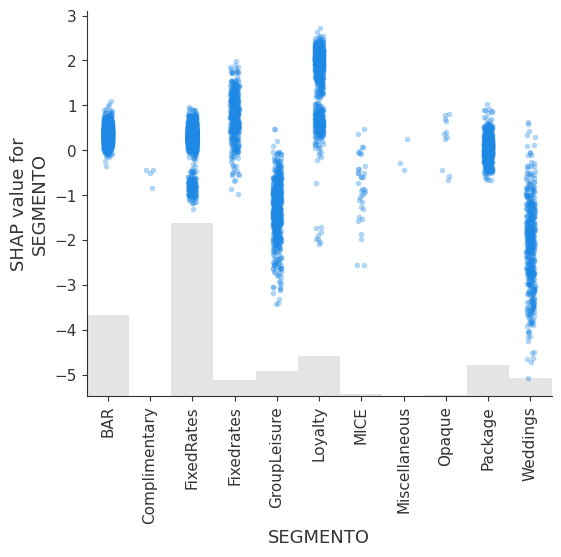

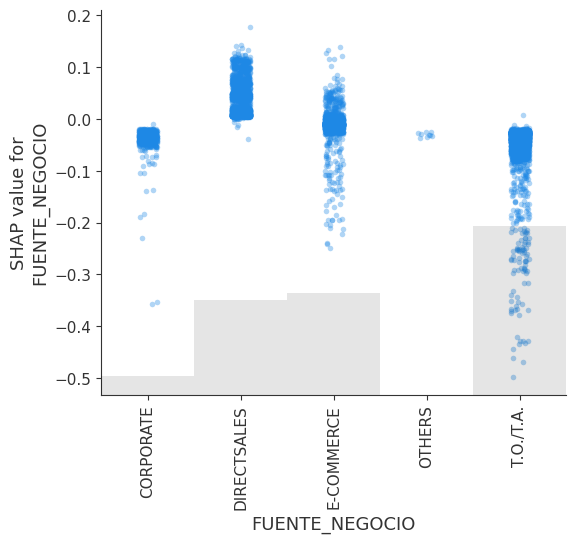

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [16]:
for col in cat_cols:
    shap.plots.scatter(shap_values[:, col], alpha=0.35)

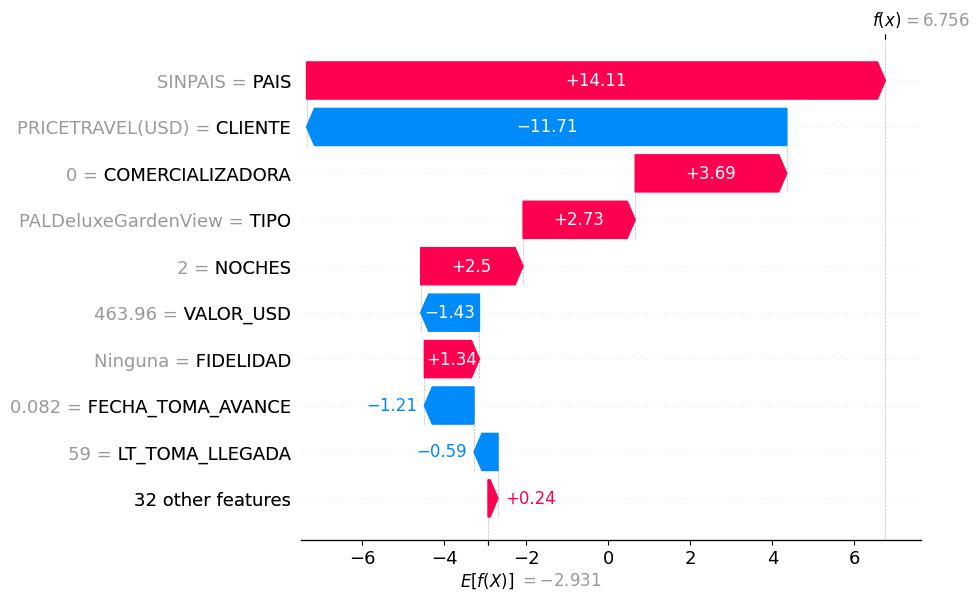

In [68]:
shap.plots.waterfall(shap_values[3], max_display=10)

In [48]:
X_test_sample.index

Index([ 315683,  112363,  555238,  924970,  955859,  193805,  124763,   85577,
       1012991,   84102,
       ...
       1093969,  605521, 1063981,  114559, 1033769, 1067867,  819976,  815761,
         84070,  624148],
      dtype='int64', length=10000)

In [66]:
y[924970]

1

In [ ]:
# Con una f(x)>6 era un 1 clarísimo
# Tiene sentido
# (Probado con otros casos de 1s y 0s)